# GEOG5990M Final Assignment

Student ID number:201780058

### Objective
<p>In this project, I want to look into the economic condition in Leeds. The tasks are as follows.</p>
<ul>
    <li>to investigate if there is an interrelationship between economically active status and employment, health, house type, car ownership, education and religion;</li>
    <li>to find the different economical groups(clusters) in Leeds by OA.</li>
</ul>
<p>The main audience of this project is the government, and the results aim to help them understand what may relate to people's economically active status and how the clustering feature in Leeds is, which may help them improve the life quality of the citizens and reduce the gap between poor and rich.</p>

### 1 Read packages and data

In [2]:
# 1.1 - read in required packages
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import geopandas as gpd
import numpy as np
# customise color map
from matplotlib.colors import ListedColormap
# OLS package
import statsmodels.api as sm
# machine learning packages
from sklearn import cluster
from sklearn.preprocessing import scale
# since I need to open ".xlsx" file, so I need the openpyxl package
# !pip install openpyxl
import openpyxl

<p>In this project,<b> six socio-demographic data</b> are imported, containing information on 
the economically active status, 
health condition, 
house type, 
car ownership, 
education
and religion
of citizens in Leeds, respectively. <b>One boundary data</b> is imported, showing the output areas in Leeds.</p>
<p><b>Data sources: </b></p>
    <ul>
        <li>1)socio-demographic datasets:
            economic activity<a href="https://www.nomisweb.co.uk/census/2011/qs601ew">[1]</a>, 
            general health<a href="https://www.nomisweb.co.uk/census/2011/qs302ew">[2]</a>, 
            dwellings type<a href="https://www.nomisweb.co.uk/census/2011/ks401ew">[3]</a>, 
            car or van availability<a href="https://www.nomisweb.co.uk/census/2011/ks404ew">[4]</a>, 
            qualifications and sutdent<a href="https://www.nomisweb.co.uk/census/2011/ks501uk">[5]</a>,
            religion<a href="https://www.nomisweb.co.uk/census/2011/ks209ew">[6]</a>
        </li>
        <li>2)boundary data: English Output Areas 2011<a href="https://borders.ukdataservice.ac.uk/bds.html">[7]</a></li>
    </ul>
<b>Other operations outside this file, before reading in data:</b>
    <ul>
        <li> I deleted the first serveral information rows in csv and xlsx files in Excel. </li>
        <li> The geojson file is also coverted from the origin shapefile in ArcGIS Pro.</li>
    </ul>

In [3]:
# 1.2 - read in data
# socio-demographic data
health_data = pd.read_csv('health.csv')
economy_data = pd.read_excel('Economic_active.xlsx',engine='openpyxl')
house_data = pd.read_excel('house_type.xlsx',engine='openpyxl')
car_data =  pd.read_excel('car_availability.xlsx',engine='openpyxl')
education_data =  pd.read_excel('education.xlsx',engine='openpyxl')
religion_data =  pd.read_excel('religion.xlsx',engine='openpyxl')
# boundary data: ouput areas in Leeds
Leeds_oa = gpd.read_file('Leeds_oa.geojson')

### 2 Data Cleaning
<p>
    According to MonkeyLearn Blog<a href="https://monkeylearn.com/blog/data-cleaning-steps/">[3]</a>, there are six steps applied in data cleaning:
    <ul>
        <li>1 - remove irrelevant data</li>
        <li>2 - eliminate duplicate data</li>
        <li>3 - fix structure errors (e.g. errors of column names)</li>
        <li>4 - deal with missing data</li>
        <li>5 - filter out data outliers</li>
        <li>6 - validate data</li>
    </ul>
</p>

##### 2.1 check data
1) check the contents of those datasets one by one

In [4]:
economy_data

,2011 output area,All usual residents aged 16 to 74,Economically active,Economically active: In employment,Economically active: Unemployed,Economically active: Full-time student,Economically Inactive,Economically inactive: Retired,Economically inactive: Student (including full-time students),Economically inactive: Looking after home or family,Economically inactive: Long-term sick or disabled,Economically inactive: Other,Unemployed: Age 16 to 24,Unemployed: Age 50 to 74,Unemployed: Never worked,Long-term unemployed
0,E00056750,211.0,161.0,150.0,6.0,5.0,50.0,31.0,7.0,4.0,7.0,1.0,2.0,0.0,0.0,5.0
1,E00056751,212.0,172.0,163.0,4.0,5.0,40.0,26.0,5.0,7.0,2.0,0.0,2.0,0.0,0.0,1.0
2,E00056752,309.0,236.0,219.0,8.0,9.0,73.0,47.0,12.0,7.0,2.0,5.0,3.0,2.0,2.0,1.0
3,E00056753,149.0,98.0,86.0,9.0,3.0,51.0,40.0,3.0,0.0,6.0,2.0,3.0,1.0,0.0,4.0
4,E00056754,208.0,170.0,159.0,7.0,4.0,38.0,24.0,4.0,5.0,0.0,5.0,2.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540,E00170888,213.0,190.0,184.0,0.0,6.0,23.0,7.0,4.0,7.0,5.0,0.0,0.0,0.0,0.0,0.0
2541,E00170889,273.0,179.0,168.0,1.0,10.0,94.0,63.0,10.0,8.0,11.0,2.0,1.0,0.0,0.0,0.0
2542,E00170890,179.0,159.0,147.0,5.0,7.0,20.0,1.0,6.0,6.0,5.0,2.0,0.0,0.0,2.0,1.0
2543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
health_data

,2011 output area,All categories: General health,Very good health,Good health,Fair health,Bad health,Very bad health
0,E00056750,279,119.0,100.0,44.0,13.0,3.0
1,E00056751,296,166.0,103.0,20.0,5.0,2.0
2,E00056752,407,203.0,150.0,43.0,8.0,3.0
3,E00056753,246,54.0,87.0,74.0,22.0,9.0
4,E00056754,272,138.0,106.0,24.0,1.0,3.0
...,...,...,...,...,...,...,...
2544,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2545,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2546,NaN,In order to protect against disclosure of pers...,NaN,NaN,NaN,NaN,NaN
2547,NaN,have been swapped between different geographic...,NaN,NaN,NaN,NaN,NaN


In [6]:
house_data

,2011 output area,Household spaces with at least one usual resident,Household spaces with no usual residents,Whole house or bungalow: Detached,Whole house or bungalow: Semi-detached,Whole house or bungalow: Terraced (including end-terrace),"Flat, maisonette or apartment: Purpose-built block of flats or tenement","Flat, maisonette or apartment: Part of a converted or shared house (including bed-sits)","Flat, maisonette or apartment: In a commercial building",Caravan or other mobile or temporary structure
0,E00056750,98.6,1.4,2.1,37.1,28.0,32.9,0.0,0.0,0.0
1,E00056751,98.2,1.8,8.9,58.0,33.0,0.0,0.0,0.0,0.0
2,E00056752,95.7,4.3,15.8,17.7,45.0,17.2,1.4,2.9,0.0
3,E00056753,92.8,7.2,0.0,7.9,24.3,48.0,4.6,13.2,2.0
4,E00056754,94.2,5.8,3.6,12.9,81.3,2.2,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2540,E00170888,96.7,3.3,14.2,8.3,37.5,39.2,0.8,0.0,0.0
2541,E00170889,96.4,3.6,39.2,54.2,1.2,2.4,1.8,1.2,0.0
2542,E00170890,99.0,1.0,1.0,22.3,48.5,27.2,1.0,0.0,0.0
2543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
car_data

,2011 output area,All categories: Car or van availability,No cars or vans in household,1 car or van in household,2 cars or vans in household,3 cars or vans in household,4 or more cars or vans in household
0,E00056750,141.0,35.0,67.0,29.0,8.0,2.0
1,E00056751,110.0,14.0,40.0,48.0,7.0,1.0
2,E00056752,200.0,31.0,100.0,61.0,5.0,3.0
3,E00056753,141.0,66.0,66.0,9.0,0.0,0.0
4,E00056754,131.0,28.0,69.0,31.0,2.0,1.0
...,...,...,...,...,...,...,...
2540,E00170888,116.0,6.0,54.0,51.0,4.0,1.0
2541,E00170889,160.0,16.0,56.0,68.0,13.0,7.0
2542,E00170890,102.0,20.0,61.0,20.0,1.0,0.0
2543,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
education_data

,2011 output area,All categories: Highest level of qualification,No qualifications,Highest level of qualification: Level 1 qualifications,Highest level of qualification: Level 2 qualifications,Highest level of qualification: Apprenticeship,Highest level of qualification: Level 3 qualifications,Highest level of qualification: Level 4 qualifications and above,Highest level of qualification: Other qualifications
0,E00056750,100.0,27.7,12.2,15.1,5.9,14.7,21.4,2.9
1,E00056751,100.0,14.0,16.2,23.2,3.9,15.4,25.0,2.2
2,E00056752,100.0,17.5,14.9,16.1,3.7,11.8,33.0,2.9
3,E00056753,100.0,46.6,11.5,14.5,2.1,7.3,14.1,3.8
4,E00056754,100.0,13.5,9.5,14.4,5.0,18.5,34.2,5.0
...,...,...,...,...,...,...,...,...,...
2540,E00170888,100.0,3.3,13.6,14.6,3.3,15.5,49.3,0.5
2541,E00170889,100.0,15.0,10.9,14.7,2.5,6.9,46.6,3.4
2542,E00170890,100.0,11.2,7.8,13.4,2.2,16.2,46.9,2.2
2543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
religion_data

,2011 output area,All categories: Religion,Christian,Buddhist,Hindu,Jewish,Muslim,Sikh,Other religion,No religion,Religion not stated
0,E00056750,279.0,162.0,0.0,0.0,0.0,8.0,0.0,1.0,81.0,27.0
1,E00056751,296.0,172.0,2.0,0.0,0.0,5.0,0.0,2.0,93.0,22.0
2,E00056752,407.0,250.0,1.0,0.0,0.0,5.0,0.0,1.0,126.0,24.0
3,E00056753,246.0,159.0,0.0,0.0,0.0,0.0,0.0,1.0,60.0,26.0
4,E00056754,272.0,140.0,3.0,0.0,0.0,0.0,0.0,1.0,101.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...
2542,E00170890,213.0,88.0,0.0,20.0,0.0,10.0,0.0,1.0,77.0,17.0
2543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2544,In order to protect against disclosure of pers...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2545,The voluntary question on religion in the 2011...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
Leeds_oa

,FID,code,label,name,geometry
0,0,E00058961,E08000035E02002335E01011713E00058961,,"POLYGON ((436439.550 443511.430, 436422.268 44..."
1,1,E00059067,E08000035E02002358E01011720E00059067,,"POLYGON ((436137.132 437051.291, 436136.990 43..."
2,2,E00056935,E08000035E02002417E01011303E00056935,,"POLYGON ((441894.061 430432.764, 441893.098 43..."
3,3,E00170058,E08000035E02002411E01033032E00170058,,"POLYGON ((429362.000 432215.000, 429363.000 43..."
4,4,E00058216,E08000035E02002433E01011541E00058216,,"POLYGON ((426664.338 427875.792, 426666.669 42..."
...,...,...,...,...,...
2538,2538,E00058597,E08000035E02002401E01011622E00058597,,"POLYGON ((433482.734 433750.215, 433481.000 43..."
2539,2539,E00059049,E08000035E02002358E01011720E00059049,,"POLYGON ((436158.548 436772.352, 436155.706 43..."
2540,2540,E00058371,E08000035E02002332E01011583E00058371,,"POLYGON ((420211.244 446683.222, 420211.098 44..."
2541,2541,E00059051,E08000035E02002370E01011723E00059051,,"POLYGON ((436614.948 436057.769, 436610.049 43..."


2) check the general info of these data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2545 entries, 0 to 2544
Data columns (total 16 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   2011 output area                                               2544 non-null   object 
 1   All usual residents aged 16 to 74                              2543 non-null   float64
 2   Economically active                                            2543 non-null   float64
 3   Economically active: In employment                             2543 non-null   float64
 4   Economically active: Unemployed                                2543 non-null   float64
 5   Economically active: Full-time student                         2543 non-null   float64
 6   Economically Inactive                                          2543 non-null   float64
 7   Economically inactive: Retired                              

<Axes: >

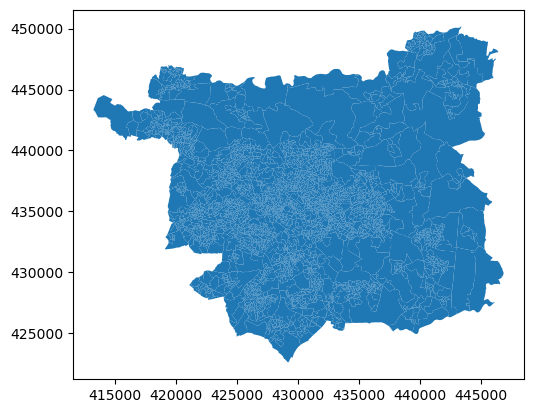

In [11]:
economy_data.info()
health_data.info()
house_data.info()
car_data.info()
education_data.info()
religion_data.info()
Leeds_oa.plot()


<p>Since every dataset is secondary data downloaded from official websites, the data is well documented, no unnecessary data and no duplicated data(with distinct oa code for each row).
In addition, from the output result of those datasets, I found that:</br>
<ul>
    <li>all of these six census data contains Null value</li>
    <li>the data type of general health in the health_data is object, instead of numeric(int or float)</li>
</ul>
<p>Thus, I will skip the first three steps and step five.</p>


##### 2.2 delete missing data

In [12]:
# clean health data
health_data.info() # contains Null
health_data = health_data.dropna(axis=0) # remove the rows containing NULL
health_data.info() # check

# clean economy data
economy_data.isna().sum() # contains NULL
economy_data = economy_data.dropna(axis='index') #remove NA rows
economy_data.info() # check

# clean house data
house_data.isna().sum() # contains NULL
house_data = house_data.dropna(axis='index') #remove NA rows
house_data.info() # check

# clean car data
car_data.isna().sum() # contains NULL
car_data = car_data.dropna(axis='index') #remove NA rows
car_data.info() # check

# clean education data
education_data.isna().sum() # contains NULL
education_data = education_data.dropna(axis='index') #remove NA rows
education_data.info() # check

# clean religion data
religion_data.isna().sum() # contains NULL
religion_data = religion_data.dropna(axis='index') #remove NA rows
religion_data.info() # check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2549 entries, 0 to 2548
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   2011 output area                2543 non-null   object 
 1   All categories: General health  2546 non-null   object 
 2   Very good health                2543 non-null   float64
 3   Good health                     2543 non-null   float64
 4   Fair health                     2543 non-null   float64
 5   Bad health                      2543 non-null   float64
 6   Very bad health                 2543 non-null   float64
dtypes: float64(5), object(2)
memory usage: 139.5+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 2543 entries, 0 to 2542
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   2011 output area                2543 non-null   object 
 1   Al

##### 2.3 adjust data type

From the step above, the Null cells in all the datasets have already been removed, and all the datasets have correct datatypes, except the health data.</br>
<ul>
    <li>the datatype of "General health" is object, instead of numeric</br>
---change the data type to float (because I want to calculate the rate, out of convenience, I don't choose int)</li>
</ul>

In [14]:
# change data type
# temp_columns is from the code cell above
health_data.loc[:, health_data.columns[1]] = health_data[health_data.columns[1]].astype(float)
health_data.dtypes
# check health data again
health_data

,2011 output area,All categories: General health,Very good health,Good health,Fair health,Bad health,Very bad health
0,E00056750,279.0,119.0,100.0,44.0,13.0,3.0
1,E00056751,296.0,166.0,103.0,20.0,5.0,2.0
2,E00056752,407.0,203.0,150.0,43.0,8.0,3.0
3,E00056753,246.0,54.0,87.0,74.0,22.0,9.0
4,E00056754,272.0,138.0,106.0,24.0,1.0,3.0
...,...,...,...,...,...,...,...
2538,E00170623,150.0,73.0,63.0,12.0,2.0,0.0
2539,E00170887,259.0,173.0,69.0,12.0,2.0,3.0
2540,E00170888,270.0,198.0,56.0,11.0,5.0,0.0
2541,E00170889,394.0,222.0,107.0,46.0,15.0,4.0


##### 2.4 validate data
According to the steps below, there is no error in these datasets. And the numbers of records in all these datasets are the same, 2543.

In [15]:
economy_data.describe()

,All usual residents aged 16 to 74,Economically active,Economically active: In employment,Economically active: Unemployed,Economically active: Full-time student,Economically Inactive,Economically inactive: Retired,Economically inactive: Student (including full-time students),Economically inactive: Looking after home or family,Economically inactive: Long-term sick or disabled,Economically inactive: Other,Unemployed: Age 16 to 24,Unemployed: Age 50 to 74,Unemployed: Never worked,Long-term unemployed
count,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000
mean,220.546205,153.334251,131.078647,10.533228,11.722375,67.211954,27.308691,18.107354,8.035785,8.847031,4.913095,2.993708,1.751475,1.886748,4.268974
std,91.523568,51.035693,43.964501,7.809770,34.153596,58.234951,15.614261,56.920458,6.413246,7.042176,15.345686,2.796670,1.588577,2.475321,3.980876
min,66.000000,32.000000,11.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,182.000000,124.000000,102.000000,5.000000,4.000000,48.000000,16.000000,5.000000,4.000000,3.000000,2.000000,1.000000,1.000000,0.000000,1.000000
50%,211.000000,150.000000,130.000000,8.000000,6.000000,60.000000,26.000000,8.000000,6.000000,7.000000,3.000000,2.000000,1.000000,1.000000,3.000000
75%,240.500000,177.000000,158.000000,14.000000,10.000000,74.000000,37.000000,13.000000,10.000000,13.000000,6.000000,4.000000,3.000000,3.000000,6.000000
max,2659.000000,1225.000000,398.000000,61.000000,1109.000000,1434.000000,98.000000,1366.000000,62.000000,43.000000,642.000000,18.000000,9.000000,20.000000,29.000000


In [16]:
health_data.describe()

,All categories: General health,Very good health,Good health,Fair health,Bad health,Very bad health
count,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000
mean,295.511207,142.074322,99.891074,37.559969,12.388517,3.597326
std,97.590881,63.837541,35.123637,14.515146,7.744751,3.158398
min,102.000000,15.000000,23.000000,3.000000,0.000000,0.000000
25%,249.500000,110.000000,82.000000,28.000000,7.000000,1.000000
50%,289.000000,136.000000,98.000000,37.000000,11.000000,3.000000
75%,326.000000,165.000000,113.000000,46.000000,16.000000,5.000000
max,2741.000000,1579.000000,971.000000,183.000000,66.000000,37.000000


In [17]:
house_data.describe()

,Household spaces with at least one usual resident,Household spaces with no usual residents,Whole house or bungalow: Detached,Whole house or bungalow: Semi-detached,Whole house or bungalow: Terraced (including end-terrace),"Flat, maisonette or apartment: Purpose-built block of flats or tenement","Flat, maisonette or apartment: Part of a converted or shared house (including bed-sits)","Flat, maisonette or apartment: In a commercial building",Caravan or other mobile or temporary structure
count,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000
mean,96.503460,3.496540,14.712072,37.790602,26.772198,16.798034,3.009398,0.794101,0.124184
std,3.533628,3.533628,20.210255,27.971518,25.788920,23.247920,6.882805,2.197697,1.970551
min,52.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,95.500000,1.500000,2.500000,12.300000,4.050000,1.000000,0.000000,0.000000,0.000000
50%,97.400000,2.600000,5.600000,32.800000,18.900000,6.400000,0.800000,0.000000,0.000000
75%,98.500000,4.500000,17.800000,60.100000,42.950000,23.050000,2.500000,0.800000,0.000000
max,100.000000,47.500000,98.200000,98.400000,95.600000,99.100000,67.800000,40.400000,82.400000


In [18]:
car_data.describe()

,All categories: Car or van availability,No cars or vans in household,1 car or van in household,2 cars or vans in household,3 cars or vans in household,4 or more cars or vans in household
count,2543.000000,2543.000000,2543.000000,2543.000000,2543.00000,2543.000000
mean,126.069996,40.419583,52.463232,27.110893,4.62092,1.455368
std,26.322723,28.731710,15.901253,17.880039,4.19089,1.903936
min,40.000000,0.000000,9.000000,0.000000,0.00000,0.000000
25%,112.000000,18.000000,42.000000,12.000000,1.00000,0.000000
50%,124.000000,34.000000,53.000000,25.000000,4.00000,1.000000
75%,137.000000,57.000000,61.000000,39.000000,7.00000,2.000000
max,343.000000,181.000000,166.000000,117.000000,52.00000,24.000000


In [19]:
education_data.describe()

,All categories: Highest level of qualification,No qualifications,Highest level of qualification: Level 1 qualifications,Highest level of qualification: Level 2 qualifications,Highest level of qualification: Apprenticeship,Highest level of qualification: Level 3 qualifications,Highest level of qualification: Level 4 qualifications and above,Highest level of qualification: Other qualifications
count,2543.0,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000
mean,100.0,24.495320,12.974636,14.251593,3.813685,13.097601,26.625993,4.737082
std,0.0,12.967792,4.767083,3.948566,2.308180,9.948342,15.253331,2.719900
min,100.0,0.000000,0.600000,1.500000,0.000000,1.800000,0.000000,0.000000
25%,100.0,14.400000,9.900000,11.800000,2.100000,8.800000,14.900000,2.900000
50%,100.0,23.700000,13.300000,14.500000,3.600000,11.100000,23.000000,4.200000
75%,100.0,33.900000,16.200000,17.000000,5.400000,13.700000,36.400000,5.800000
max,100.0,74.300000,28.100000,29.100000,11.900000,85.700000,78.600000,19.100000


In [20]:
religion_data.describe()

,All categories: Religion,Christian,Buddhist,Hindu,Jewish,Muslim,Sikh,Other religion,No religion,Religion not stated
count,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000
mean,295.511207,165.076681,1.090051,2.771530,2.692489,16.033032,3.505309,0.942194,83.456154,19.943767
std,97.590881,56.807424,2.202243,5.726945,10.786927,36.671513,8.169325,1.317512,46.941964,8.639674
min,102.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000
25%,249.500000,132.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,58.000000,14.000000
50%,289.000000,164.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,77.000000,19.000000
75%,326.000000,197.000000,1.000000,3.000000,1.000000,14.000000,4.000000,1.000000,99.000000,24.000000
max,2741.000000,1222.000000,63.000000,70.000000,177.000000,387.000000,106.000000,11.000000,1135.000000,152.000000


### 3 Data preprocessing
##### 3.1 Variable Description
<p>Since I want to inverstigate the interrelationship between those variables, I chose factors as below.</p>
<table border="1">
        <tr>
            <th>Index</th>
            <th>Factor</th>
            <th>Description</th>
        </tr>
        <tr>
            <td>1</td>
            <td>economic condition</td>
            <td>the percentage of people who are economically active</td>
        </tr>
        <tr>
            <td>2</td>
            <td>employment condition</td>
            <td>the percentage of people in employment</td>
        </tr>
        <tr>
            <td>3</td>
            <td>health condition</td>
            <td>the percentage of people with very good and good health</td>
        </tr>
        <tr>
            <td>4</td>
            <td>house condition</td>
            <td>the percentage of people living in whole house or bunglow</td>
        </tr>
        <tr>
            <td>5</td>
            <td>car ownership</td>
            <td>the percentage of people with car</td>
        </tr>
        <tr>
            <td>6</td>
            <td>religion condition</td>
            <td>the percentage of people with religion</td>
        </tr>
        <tr>
            <td>7</td>
            <td>education condition</td>
            <td>the percentage of people with Level 4 qualifications and above</td>
        </tr>
    </table>
</br>As the absolute value (number of people in each category) is not comparable, so I need to convert the values to percentage.

##### 3.2 Variable calculation
New variable "merge_data" will be created to save the variables needed.
1) economic condition - per_economyActive
2) employment condition - per_employment

In [24]:
# copy oa code and numbers of economically active , employed and all residents
merge_data = economy_data[economy_data.columns[0:4]]
# calculate the percentage of people who are in employment and economically active
merge_data.loc[:,'Economically active: In employment'] = merge_data['Economically active: In employment'] / merge_data['All usual residents aged 16 to 74'] * 100
# calculate the percentage of people who are economically active
merge_data.loc[:,'Economically active'] = merge_data['Economically active'] / merge_data['All usual residents aged 16 to 74'] * 100
# drop unnecessary column
merge_data = merge_data.drop('All usual residents aged 16 to 74',axis=1)
# alter column names
merge_data.columns = ['2011 output area', 'per_economyActive', 'per_employment']
merge_data

,2011 output area,per_economyActive,per_employment
0,E00056750,76.303318,71.090047
1,E00056751,81.132075,76.886792
2,E00056752,76.375405,70.873786
3,E00056753,65.771812,57.718121
4,E00056754,81.730769,76.442308
...,...,...,...
2538,E00170623,84.920635,73.809524
2539,E00170887,89.847716,85.786802
2540,E00170888,89.201878,86.384977
2541,E00170889,65.567766,61.538462


3) health condition - per_goodHealth

In [25]:
# create a temp data to save the data in process
temp_data = health_data
temp_data.loc[:, 'per_goodHealth'] = 100 * (temp_data['Very good health'] + temp_data['Good health']) / temp_data['All categories: General health']
# delete the unecessary columns
temp_data = temp_data.drop(temp_data.columns[1:-1],axis=1)
# join data to merge_data
merge_data = merge_data.merge(temp_data, left_on='2011 output area', right_on='2011 output area', how='left')
merge_data

,2011 output area,per_economyActive,per_employment,per_goodHealth
0,E00056750,76.303318,71.090047,78.494624
1,E00056751,81.132075,76.886792,90.878378
2,E00056752,76.375405,70.873786,86.732187
3,E00056753,65.771812,57.718121,57.317073
4,E00056754,81.730769,76.442308,89.705882
...,...,...,...,...
2538,E00170623,84.920635,73.809524,90.666667
2539,E00170887,89.847716,85.786802,93.436293
2540,E00170888,89.201878,86.384977,94.074074
2541,E00170889,65.567766,61.538462,83.502538


4) house condition - per_wholeHouse
</br></br>There are lots of house types. I just choose one typical type of dewlling- whole house or bunglow.</br>
As the values are already percentages, I only need to add up the categories with "whole house or bungalow".

In [26]:
# copy data, containing columns: 
    #    '2011 output area', 
    #    'Household spaces with at least one usual resident',
    #    'Household spaces with no usual residents',
    #    'Whole house or bungalow: Detached',
    #    'Whole house or bungalow: Semi-detached',
    #    'Whole house or bungalow: Terraced (including end-terrace)']
temp_data = house_data.iloc[:,0:6]
# calculate percentage of people living in whole house or bungalow
temp_data.loc[:,'per_wholeHouse'] = temp_data['Whole house or bungalow: Detached'] + temp_data['Whole house or bungalow: Semi-detached'] + \
                                            temp_data['Whole house or bungalow: Terraced (including end-terrace)']
# delete the unecessary columns
temp_data = temp_data.drop(temp_data.columns[1:-1],axis=1)
# join data to merge_data
merge_data = merge_data.merge(temp_data, left_on='2011 output area', right_on='2011 output area', how='left')
merge_data

,2011 output area,per_economyActive,per_employment,per_goodHealth,per_wholeHouse
0,E00056750,76.303318,71.090047,78.494624,67.2
1,E00056751,81.132075,76.886792,90.878378,99.9
2,E00056752,76.375405,70.873786,86.732187,78.5
3,E00056753,65.771812,57.718121,57.317073,32.2
4,E00056754,81.730769,76.442308,89.705882,97.8
...,...,...,...,...,...
2538,E00170623,84.920635,73.809524,90.666667,93.2
2539,E00170887,89.847716,85.786802,93.436293,84.6
2540,E00170888,89.201878,86.384977,94.074074,60.0
2541,E00170889,65.567766,61.538462,83.502538,94.6


5) car ownership - per_withCar
This data only contains the number of people in each category, so I need to calculate the percentage.

In [27]:
# copy data, columns: '2011 output area', 'All categories: Car or van availability', 'No cars or vans in household'
temp_data = car_data.iloc[:,0:3]
# calculate percentage of people with car: 100* (1 - rate of people with no car)
temp_data.loc[:,'per_withCar'] = 100 * (1 - (temp_data['No cars or vans in household'] / temp_data['All categories: Car or van availability']))
# delete the unecessary columns
temp_data = temp_data.drop(temp_data.columns[1:-1],axis=1)
# join data to merge_data
merge_data = merge_data.merge(temp_data, left_on='2011 output area', right_on='2011 output area', how='left')
merge_data

,2011 output area,per_economyActive,per_employment,per_goodHealth,per_wholeHouse,per_withCar
0,E00056750,76.303318,71.090047,78.494624,67.2,75.177305
1,E00056751,81.132075,76.886792,90.878378,99.9,87.272727
2,E00056752,76.375405,70.873786,86.732187,78.5,84.500000
3,E00056753,65.771812,57.718121,57.317073,32.2,53.191489
4,E00056754,81.730769,76.442308,89.705882,97.8,78.625954
...,...,...,...,...,...,...
2538,E00170623,84.920635,73.809524,90.666667,93.2,63.529412
2539,E00170887,89.847716,85.786802,93.436293,84.6,87.378641
2540,E00170888,89.201878,86.384977,94.074074,60.0,94.827586
2541,E00170889,65.567766,61.538462,83.502538,94.6,90.000000


6) religion condition - per_noReligion
</br></br>
The column 'No religion' in religion_data is what I need.

In [28]:
# copy data
temp_data = religion_data[['2011 output area', 'All categories: Religion', 'No religion']]
# calculate percentage
temp_data.loc[:, 'per_noReligion'] = 100 * temp_data['No religion'] / temp_data['All categories: Religion']
# delete the unecessary columns
temp_data = temp_data.drop(temp_data.columns[1:-1],axis=1)
# join data to merge_data
merge_data = merge_data.merge(temp_data, left_on='2011 output area', right_on='2011 output area', how='left')
merge_data

/var/folders/20/mv3lb8nj20s5t6nx_gm59wxc0000gn/T/ipykernel_1719/1315018131.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_data.loc[:, 'per_noReligion'] = 100 * temp_data['No religion'] / temp_data['All categories: Religion']


,2011 output area,per_economyActive,per_employment,per_goodHealth,per_wholeHouse,per_withCar,per_noReligion
0,E00056750,76.303318,71.090047,78.494624,67.2,75.177305,29.032258
1,E00056751,81.132075,76.886792,90.878378,99.9,87.272727,31.418919
2,E00056752,76.375405,70.873786,86.732187,78.5,84.500000,30.958231
3,E00056753,65.771812,57.718121,57.317073,32.2,53.191489,24.390244
4,E00056754,81.730769,76.442308,89.705882,97.8,78.625954,37.132353
...,...,...,...,...,...,...,...
2538,E00170623,84.920635,73.809524,90.666667,93.2,63.529412,49.333333
2539,E00170887,89.847716,85.786802,93.436293,84.6,87.378641,37.065637
2540,E00170888,89.201878,86.384977,94.074074,60.0,94.827586,32.592593
2541,E00170889,65.567766,61.538462,83.502538,94.6,90.000000,22.335025


7) education condition - per_highEdu
</br></br>
In thi variable, I will chose the category "Highest level of qualification: Level 4 qualifications and above" to present.

In [29]:
# copy data
temp_data = education_data[['2011 output area', 'Highest level of qualification: Level 4 qualifications and above']]
temp_data.columns = ['2011 output area', 'per_highEdu']
# join data to merge_data
merge_data = merge_data.merge(temp_data, left_on='2011 output area', right_on='2011 output area', how='left')
merge_data

,2011 output area,per_economyActive,per_employment,per_goodHealth,per_wholeHouse,per_withCar,per_noReligion,per_highEdu
0,E00056750,76.303318,71.090047,78.494624,67.2,75.177305,29.032258,21.4
1,E00056751,81.132075,76.886792,90.878378,99.9,87.272727,31.418919,25.0
2,E00056752,76.375405,70.873786,86.732187,78.5,84.500000,30.958231,33.0
3,E00056753,65.771812,57.718121,57.317073,32.2,53.191489,24.390244,14.1
4,E00056754,81.730769,76.442308,89.705882,97.8,78.625954,37.132353,34.2
...,...,...,...,...,...,...,...,...
2538,E00170623,84.920635,73.809524,90.666667,93.2,63.529412,49.333333,26.0
2539,E00170887,89.847716,85.786802,93.436293,84.6,87.378641,37.065637,39.7
2540,E00170888,89.201878,86.384977,94.074074,60.0,94.827586,32.592593,49.3
2541,E00170889,65.567766,61.538462,83.502538,94.6,90.000000,22.335025,46.6


##### 3.3 variable checking

In [30]:
merge_data.describe()

,per_economyActive,per_employment,per_goodHealth,per_wholeHouse,per_withCar,per_noReligion,per_highEdu
count,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000
mean,70.090675,60.782214,81.187357,79.274872,68.056849,28.156594,26.625993
std,10.193037,14.047584,8.266675,25.277043,20.339383,9.880907,15.253331
min,21.266073,1.020408,33.064516,0.000000,15.846995,2.035623,0.000000
25%,64.356436,53.369331,77.152318,70.300000,51.592615,21.062030,14.900000
50%,70.984456,63.302752,82.040816,89.700000,72.033898,27.446809,23.000000
75%,76.709578,70.370370,86.783662,97.700000,85.714286,34.414446,36.400000
max,96.093750,93.750000,97.674419,100.100000,100.000000,61.660079,78.600000


1) extreme values </br></br>
From the result above, there are some extreme values. I first want to check the oa with minimum employment rate, to find if there is an error.

In [31]:
# get oa code
code = merge_data.loc[merge_data['per_employment']< 2, '2011 output area']
code

2367    E00169601
Name: 2011 output area, dtype: object

In [32]:
# to see the detail of employment condition
economy_data.loc[economy_data['2011 output area'] == code.iloc[0]]

,2011 output area,All usual residents aged 16 to 74,Economically active,Economically active: In employment,Economically active: Unemployed,Economically active: Full-time student,Economically Inactive,Economically inactive: Retired,Economically inactive: Student (including full-time students),Economically inactive: Looking after home or family,Economically inactive: Long-term sick or disabled,Economically inactive: Other,Unemployed: Age 16 to 24,Unemployed: Age 50 to 74,Unemployed: Never worked,Long-term unemployed
2367,E00169601,1078.0,617.0,11.0,8.0,598.0,461.0,0.0,459.0,0.0,1.0,1.0,7.0,0.0,1.0,1.0


According to the result above, the reason why the rate is extremely low is that most of the reisidents are student. I also want to look into the extreme value of whole house and education.

In [33]:
# get oa with extremely low rate of people living in whole house
code = merge_data.loc[merge_data['per_wholeHouse']< 0.1, '2011 output area']
# loc rows
house_data.loc[house_data['2011 output area'].isin(code.to_list())]

,2011 output area,Household spaces with at least one usual resident,Household spaces with no usual residents,Whole house or bungalow: Detached,Whole house or bungalow: Semi-detached,Whole house or bungalow: Terraced (including end-terrace),"Flat, maisonette or apartment: Purpose-built block of flats or tenement","Flat, maisonette or apartment: Part of a converted or shared house (including bed-sits)","Flat, maisonette or apartment: In a commercial building",Caravan or other mobile or temporary structure
2409,E00169788,80.3,19.7,0.0,0.0,0.0,95.3,1.6,3.1,0.0
2413,E00169794,95.7,4.3,0.0,0.0,0.0,98.9,0.0,1.1,0.0
2417,E00169800,94.1,5.9,0.0,0.0,0.0,94.9,0.7,4.4,0.0
2423,E00169810,91.6,8.4,0.0,0.0,0.0,81.9,7.2,10.8,0.0
2425,E00169813,90.3,9.7,0.0,0.0,0.0,81.3,4.5,14.2,0.0


The results shows that OAs with zero percentage of whole house is the area most residents living in aprtments.

In [34]:
# get oa with extremely low rate of people with high education
code = merge_data.loc[merge_data['per_highEdu']< 0.1, '2011 output area']
# loc row(s)
education_data.loc[education_data['2011 output area'].isin(code.to_list())]

,2011 output area,All categories: Highest level of qualification,No qualifications,Highest level of qualification: Level 1 qualifications,Highest level of qualification: Level 2 qualifications,Highest level of qualification: Apprenticeship,Highest level of qualification: Level 3 qualifications,Highest level of qualification: Level 4 qualifications and above,Highest level of qualification: Other qualifications
2219,E00059079,100.0,60.5,15.1,16.3,1.2,3.5,0.0,3.5


It turns out that this oa is with relatively low education level, which causes the zero percentage of high education.

2) outlier</br></br>
The maximum value of per_wholeHouse exceeds 100. I needs to check what caused this.

In [35]:
# get oa with outlier
code = merge_data.loc[merge_data['per_wholeHouse']> 100.001, '2011 output area']
# loc row(s)
house_data.loc[house_data['2011 output area'].isin(code.to_list())]

,2011 output area,Household spaces with at least one usual resident,Household spaces with no usual residents,Whole house or bungalow: Detached,Whole house or bungalow: Semi-detached,Whole house or bungalow: Terraced (including end-terrace),"Flat, maisonette or apartment: Purpose-built block of flats or tenement","Flat, maisonette or apartment: Part of a converted or shared house (including bed-sits)","Flat, maisonette or apartment: In a commercial building",Caravan or other mobile or temporary structure
20,E00056770,97.7,2.3,7.8,50.4,41.9,0.0,0.0,0.0,0.0
51,E00056803,99.1,0.9,2.6,82.8,14.7,0.0,0.0,0.0,0.0
300,E00057063,96.6,3.4,5.2,89.7,5.2,0.0,0.0,0.0,0.0
629,E00057417,99.2,0.8,13.2,85.3,1.6,0.0,0.0,0.0,0.0
639,E00057427,99.0,1.0,8.6,62.9,28.6,0.0,0.0,0.0,0.0
644,E00057432,99.2,0.8,16.0,72.3,11.8,0.0,0.0,0.0,0.0
660,E00057448,97.3,2.7,1.4,77.6,21.1,0.0,0.0,0.0,0.0
719,E00057507,98.3,1.7,6.0,93.2,0.9,0.0,0.0,0.0,0.0
768,E00057556,97.3,2.7,73.5,25.7,0.9,0.0,0.0,0.0,0.0
777,E00057565,96.8,3.2,4.3,77.7,18.1,0.0,0.0,0.0,0.0


According to the table above, outliers exist because of decimal rounding. Thus, I can manually alter the value to 100.0.

In [36]:
# correct outliers
merge_data.loc[merge_data['per_wholeHouse']> 100.001, 'per_wholeHouse'] = 100

After correction, check the data again. From the description output, my conclusion is that there are no errors.</br> Therefore, the next analysis step can be carried out.

In [38]:
merge_data.describe()

,per_economyActive,per_employment,per_goodHealth,per_wholeHouse,per_withCar,per_noReligion,per_highEdu
count,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000
mean,70.090675,60.782214,81.187357,79.274007,68.056849,28.156594,26.625993
std,10.193037,14.047584,8.266675,25.276332,20.339383,9.880907,15.253331
min,21.266073,1.020408,33.064516,0.000000,15.846995,2.035623,0.000000
25%,64.356436,53.369331,77.152318,70.300000,51.592615,21.062030,14.900000
50%,70.984456,63.302752,82.040816,89.700000,72.033898,27.446809,23.000000
75%,76.709578,70.370370,86.783662,97.700000,85.714286,34.414446,36.400000
max,96.093750,93.750000,97.674419,100.000000,100.000000,61.660079,78.600000


### 4 exploratory data analysis and modelling
Exploratory data analysis, EDA, is a process to figure out what information the data can present, which includes patterns, relationships, anomalies, etc<a href="https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166">[9]</a>. In this part, the relationship between variables, the influence on the economy active, and the number of clusters will be investigated. The latter two results will be visualised in the final part.

##### 4.1 relationship between variables

1) Pairplots

<p>
    Pairplot is one of the most effective tools in EDA, giving insights of the distribution of single variables and the relationships between variables<a href="https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166">[9]</a>.
</p>
<p>
    After running the code below, it is evident to find there is a strong relationship between percentage of economically active and the percentage of people in employment, whilst others have no evidently strong relationships. Except for the percentage of people living in whole house, which shows a pattern of the higher the value is, the higher the frequency is, the distributions other five variables have another pattern- the median values have higher frequency.
</p>

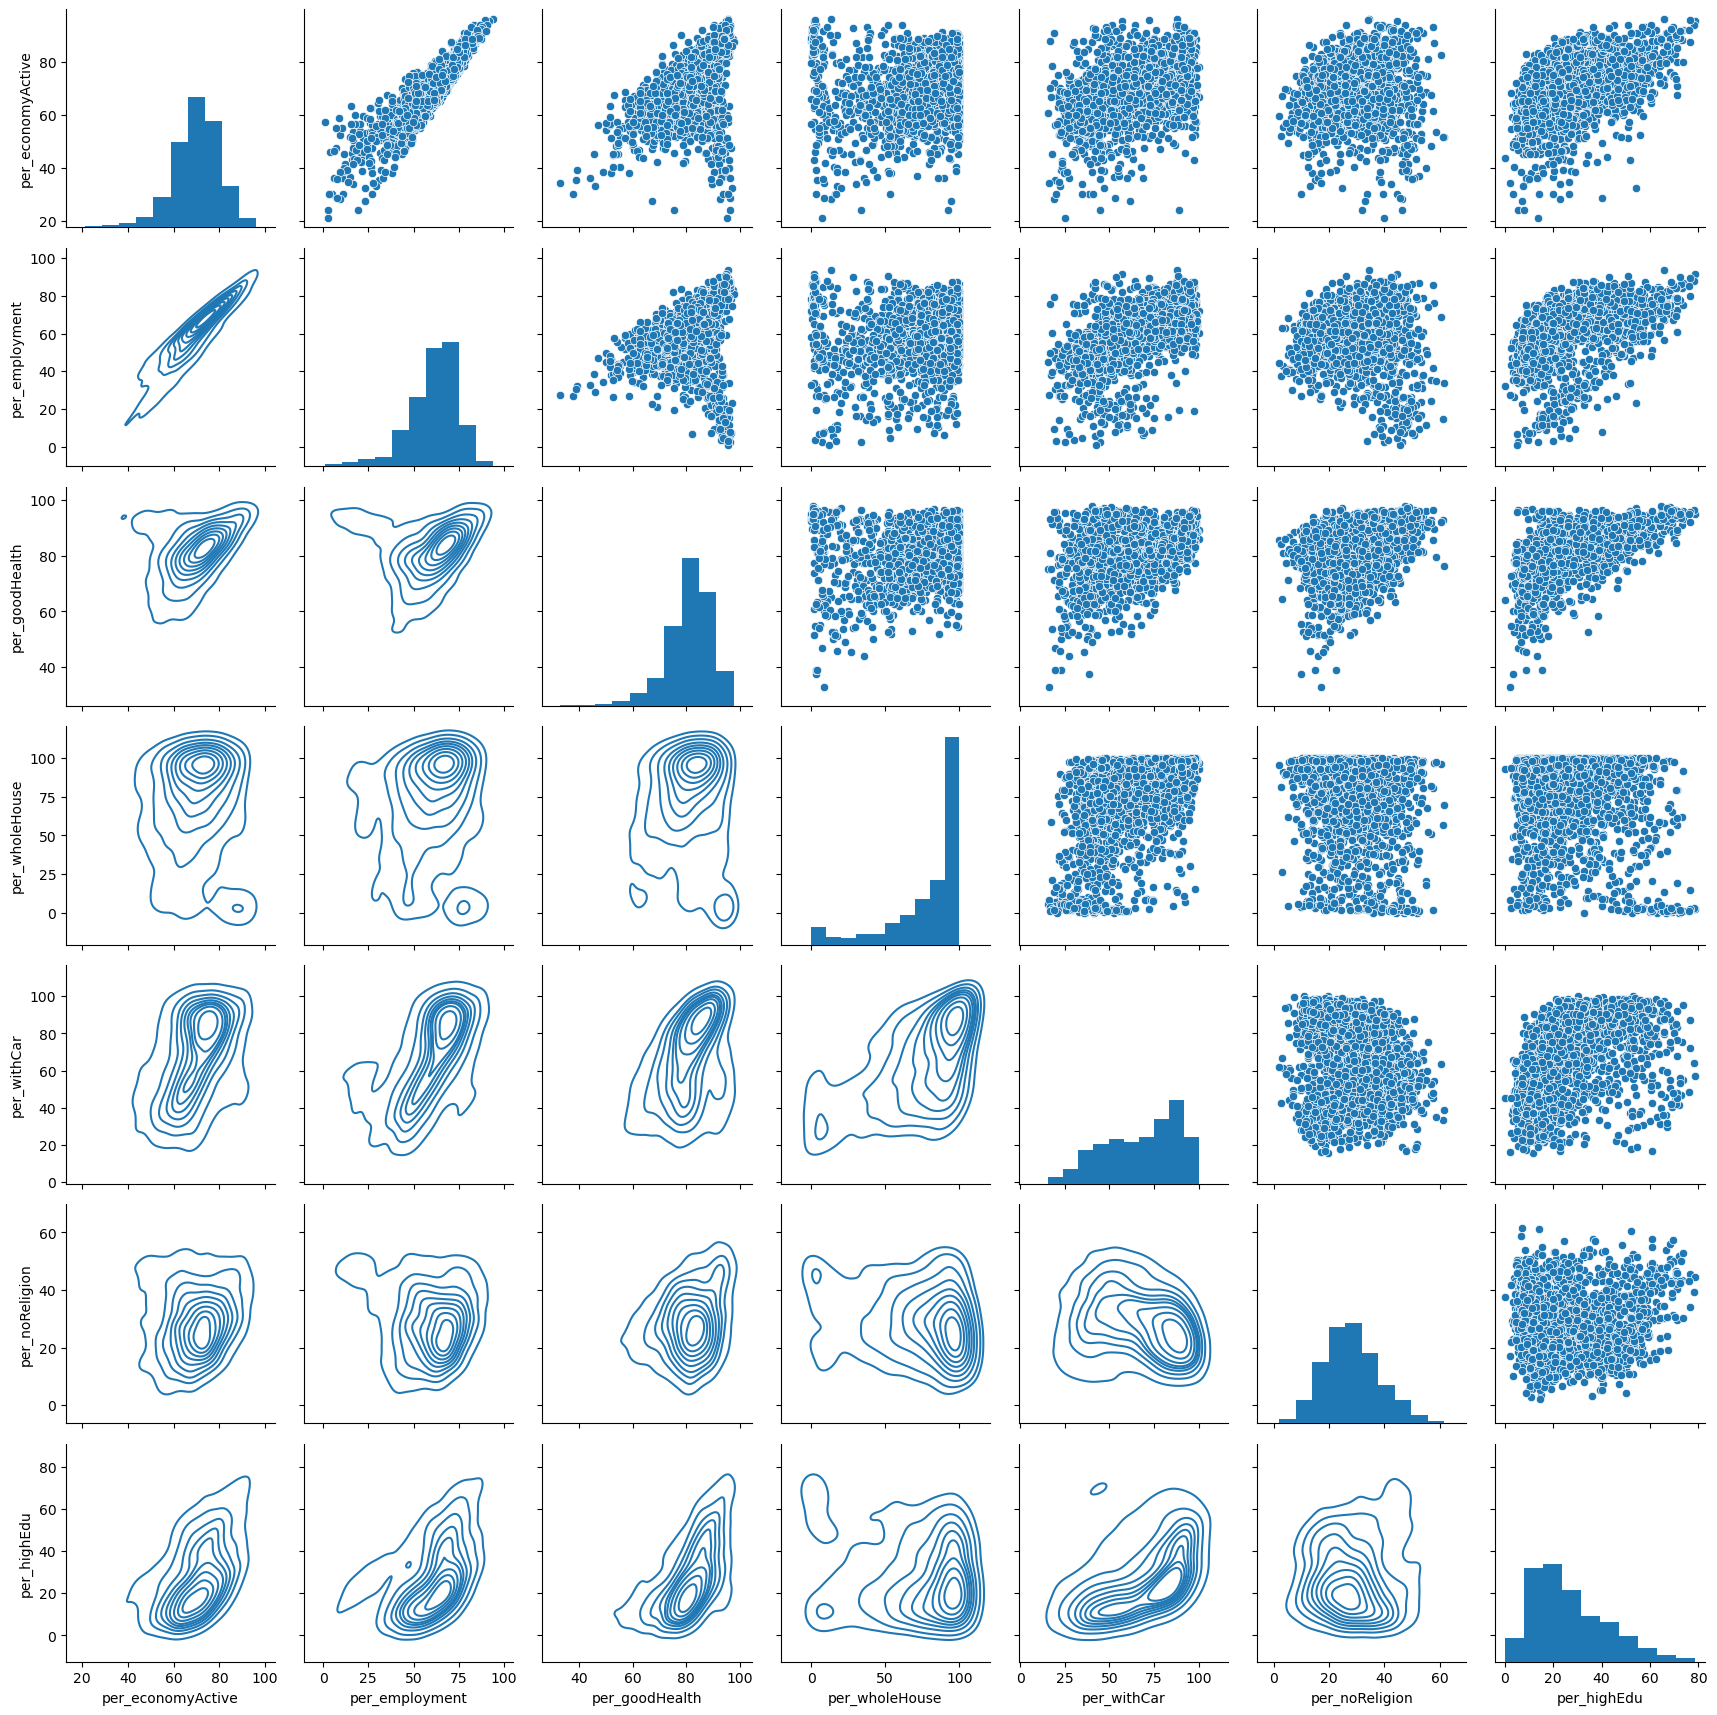

In [39]:
# create an instance of PairGrid class
grid = sns.PairGrid(data=merge_data, vars = merge_data.columns[1:])
# map scatter point to the upper area
grid = grid.map_upper(sns.scatterplot)
# map histogram to the diagonal
grid = grid.map_diag(plt.hist)
#  map density plots to the lower triangle
grid = grid.map_lower(sns.kdeplot)

2) correlation coefficient and Heat map
<p>From the pair plots, we can tell the general trend of the pairwise relationships. To make it more specific and accurate, I decide to calculate the extact correlation coefficients for those variables and utilise a heat map to visualise their relationships.</p>

In [40]:
# CORRELATION COEFFICIENT

# calculate the Correlation coefficient
merge_data_cor = merge_data[merge_data.columns[1:]].corr('spearman')
merge_data_cor

,per_economyActive,per_employment,per_goodHealth,per_wholeHouse,per_withCar,per_noReligion,per_highEdu
per_economyActive,1.000000,0.931625,0.494935,0.162772,0.465731,0.164531,0.489506
per_employment,0.931625,1.000000,0.470970,0.259872,0.630716,0.030325,0.543311
per_goodHealth,0.494935,0.470970,1.000000,0.183196,0.482134,0.189992,0.629300
per_wholeHouse,0.162772,0.259872,0.183196,1.000000,0.566510,-0.231353,0.035930
per_withCar,0.465731,0.630716,0.482134,0.566510,1.000000,-0.308166,0.568266
per_noReligion,0.164531,0.030325,0.189992,-0.231353,-0.308166,1.000000,-0.061005
per_highEdu,0.489506,0.543311,0.629300,0.035930,0.568266,-0.061005,1.000000


<p>In the visualisation of the heat map, I utilise the "cividis" colour map, as it is "a color map optimized for color vision deficiency"<a href="https://github.com/benmaier/cividis">[10]</a>.</p>

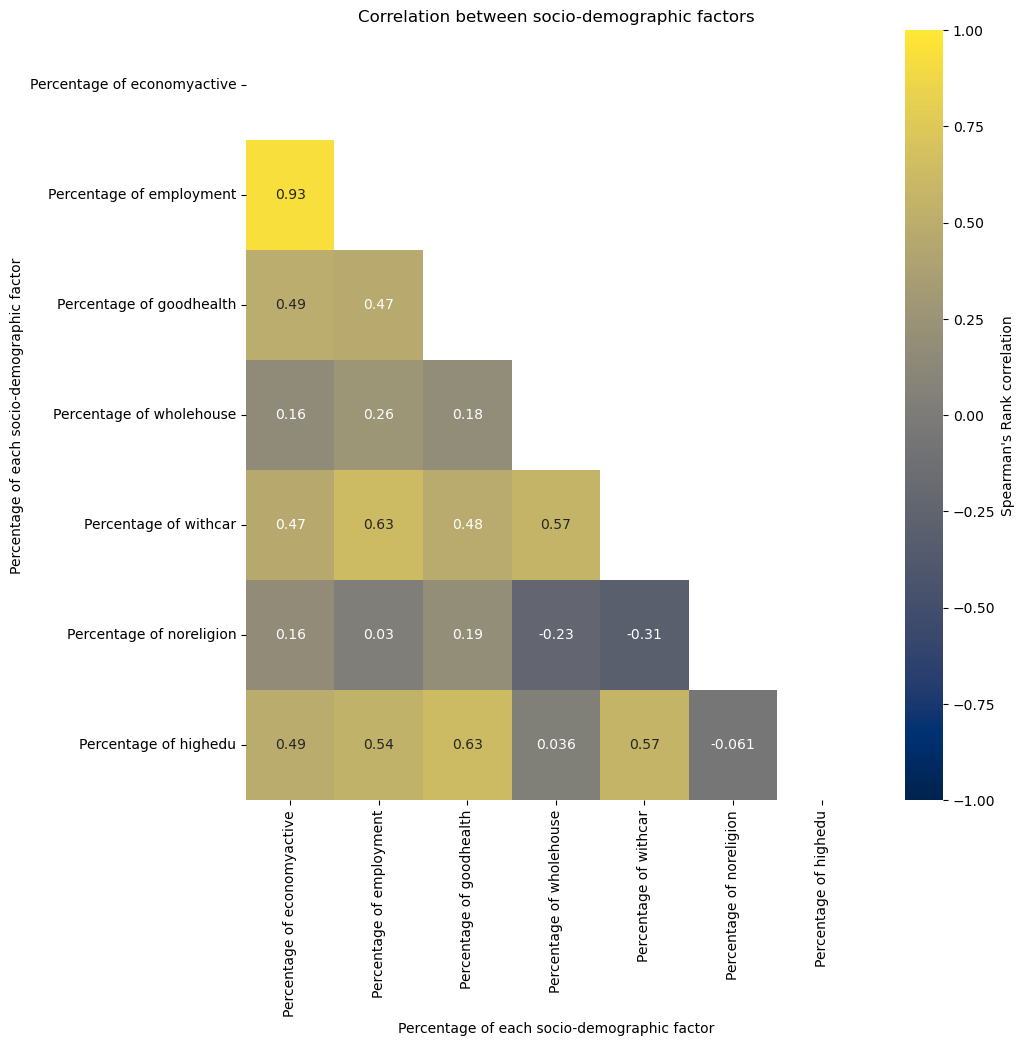

In [41]:
# HEAT MAP

# define plot size
fig,ax = plt.subplots(figsize=(10, 10))

# define mask to apply to upper right hand corner of the plot
data_to_mask = np.triu(np.ones_like(merge_data_cor))

# define axis tick labels
x_axis_labels = merge_data_cor.columns.str.replace('per_','percentage of ')
y_axis_labels = merge_data_cor.index.str.replace('per_','percentage of ')

# capitalize each tick label
x_axis_labels = [element.capitalize() for element in x_axis_labels]
y_axis_labels = [element.capitalize() for element in y_axis_labels]

# plot a heatmap of the correlation dataframe
sns.heatmap(merge_data_cor, 
            # annotate so spearman's rank correlation values are displayed on the squares
            annot=True, 
            # define colourmap : "cividis"
            cmap='cividis', 
            # define value of minimum colour on cbar
            vmin=-1, 
            # define value of maximum colou on cbar
            vmax=1,
            # add the mask
            mask=data_to_mask, 
            # use the custom tick labels
            xticklabels=x_axis_labels, 
            yticklabels=y_axis_labels,
            # add a label to the cbar
            cbar_kws={'label': "Spearman's Rank correlation"},
            # plot on the axis we defined
            ax=ax)

# Set axis labels
ax.set(xlabel="Percentage of each socio-demographic factor", 
       ylabel="Percentage of each socio-demographic factor",
      title ='Correlation between socio-demographic factors' );
# plt.savefig('Priority_Places_for_Food_Index_Domain_Correlation.png')

<p></p>
<p>According to the heat map, the pairwise variables below have relatively strong correlation, with a absolute value over 0.6, which is generally considered as the threshold of strong ssociation<a href="https://www.bmj.com/about-bmj/resources-readers/publications/statistics-square-one/11-correlation-and-regression">[11]</a>.</p>
<ul>
    <li>employment and economy(0.93)</li>
    <li>car availability and employment(0.63)</li>
    <li>education and health(0.63)</li>
</ul>

##### 4.2 influence on the economy active
<p>Ordinary least squares (OLS) regression is a method to find a linear relationship between predictor variables and the response variable<a href="https://www.statology.org/ols-regression-python/">[12]</a>.</p>
<p>This part will implement the OLS method to investigate the relationship between the economically active and the other variables. Considering the influence of collinearity, I will choose variables: percentages of people in employment, people with good health, people living in whole house and people with no religion.</p>

In [42]:
merge_data

,2011 output area,per_economyActive,per_employment,per_goodHealth,per_wholeHouse,per_withCar,per_noReligion,per_highEdu
0,E00056750,76.303318,71.090047,78.494624,67.2,75.177305,29.032258,21.4
1,E00056751,81.132075,76.886792,90.878378,99.9,87.272727,31.418919,25.0
2,E00056752,76.375405,70.873786,86.732187,78.5,84.500000,30.958231,33.0
3,E00056753,65.771812,57.718121,57.317073,32.2,53.191489,24.390244,14.1
4,E00056754,81.730769,76.442308,89.705882,97.8,78.625954,37.132353,34.2
...,...,...,...,...,...,...,...,...
2538,E00170623,84.920635,73.809524,90.666667,93.2,63.529412,49.333333,26.0
2539,E00170887,89.847716,85.786802,93.436293,84.6,87.378641,37.065637,39.7
2540,E00170888,89.201878,86.384977,94.074074,60.0,94.827586,32.592593,49.3
2541,E00170889,65.567766,61.538462,83.502538,94.6,90.000000,22.335025,46.6


In [43]:
# define dependent variable
y = merge_data['per_economyActive']
# define independent variables
X = merge_data[['per_employment', 'per_goodHealth', 'per_wholeHouse', 'per_noReligion']]
# intercept
X = sm.add_constant(X)
#fit simple linear regression model
ols_model = sm.OLS(y,X).fit()

#view model summary
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:      per_economyActive   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     5247.
Date:                Wed, 15 May 2024   Prob (F-statistic):               0.00
Time:                        15:30:28   Log-Likelihood:                -6680.7
No. Observations:                2543   AIC:                         1.337e+04
Df Residuals:                    2538   BIC:                         1.340e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             12.6702      0.669     18.

<p><b>Result:</b> Based on the summary of the OLS model, the variables, the percentages of people in employment(with coefficient of 0.6484), people with good health(0.201), people living in whole house(-0.0288) and people with no religio(0.1413), are all statistically significant. And the model is strongly fit to the data, with an adjusted R-square of 0.892.</p>

##### 4.3 socio-demographic clusters in Leeds
<p>
    K-means clustering is an unsupervised machine learning method used for grouping data points into clusters<a href="https://github.com/FrancescaPontin/GEOG5990">[13]</a>. 
    In this project, the K-means clustering method will be implemented to see the socio-demographic clusters in Leeds. 
    Due to the importance of the choice of the cluster number, the k will be determined in this part based on the elbow method in this part, to prepare for the visualisation in next part.
</p>

1) determination on k


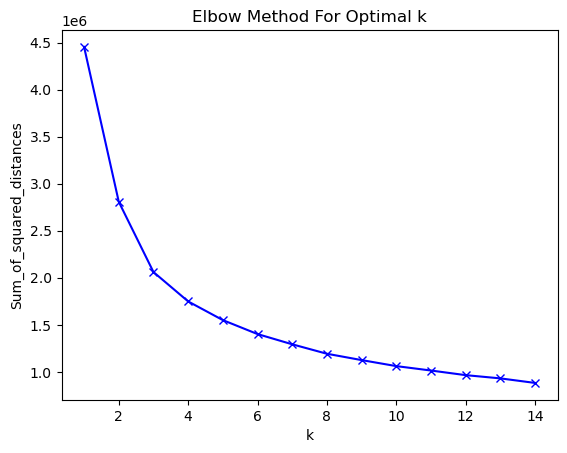

In [44]:
# create an empty list to fill with values later
Sum_of_squared_distances = []

# get a range of numbers from 1 to 15
K = range(1,15)
#for each number in the range 1 to 15
for k in K:
    # create a k-means model with that number of clusters
    # set random state 
    km = cluster.KMeans(n_clusters=k, init="random", random_state=123)
    # fit the model using the variables of interest (in this case the six sociodemographic percentages)
    km = km.fit(merge_data.iloc[:, 1:].values)
    # calculate the sum of the squared distances and add this to the 'Sum_of_squared_distances' list we created earlier
    Sum_of_squared_distances.append(km.inertia_)

# plot the sum of squared distances against the number of clusters
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

<p><b>Result: </b>According to the graph above, from the k value of 5, the decreasing speed of the "sum of squared distances" gradually slows down. So I choose k as 5.</p>

2) clustering

In [45]:
# run k-means clustering method with 5 clusters
# set random state 
km = cluster.KMeans(n_clusters=5, init="random", random_state=123)
# fit the model using the variables of interest (in this case the six sociodemographic percentages)
km = km.fit(merge_data.iloc[:, 1:].values)

In [46]:
# look up the labels
km.labels_

array([4, 4, 3, ..., 3, 3, 3], dtype=int32)

In [47]:
# append labels to data
merge_data.loc[:, 'cluster'] = km.labels_
merge_data

,2011 output area,per_economyActive,per_employment,per_goodHealth,per_wholeHouse,per_withCar,per_noReligion,per_highEdu,cluster
0,E00056750,76.303318,71.090047,78.494624,67.2,75.177305,29.032258,21.4,4
1,E00056751,81.132075,76.886792,90.878378,99.9,87.272727,31.418919,25.0,4
2,E00056752,76.375405,70.873786,86.732187,78.5,84.500000,30.958231,33.0,3
3,E00056753,65.771812,57.718121,57.317073,32.2,53.191489,24.390244,14.1,0
4,E00056754,81.730769,76.442308,89.705882,97.8,78.625954,37.132353,34.2,3
...,...,...,...,...,...,...,...,...,...
2538,E00170623,84.920635,73.809524,90.666667,93.2,63.529412,49.333333,26.0,4
2539,E00170887,89.847716,85.786802,93.436293,84.6,87.378641,37.065637,39.7,3
2540,E00170888,89.201878,86.384977,94.074074,60.0,94.827586,32.592593,49.3,3
2541,E00170889,65.567766,61.538462,83.502538,94.6,90.000000,22.335025,46.6,3


3) inverstigate the clusters

In [48]:
# get the mean value for each cluster
merge_data_mean = merge_data.groupby('cluster')[merge_data.columns[1:-1]].mean().reset_index()
merge_data_mean

,cluster,per_economyActive,per_employment,per_goodHealth,per_wholeHouse,per_withCar,per_noReligion,per_highEdu
0,0,56.628106,40.832191,72.510578,32.229921,38.853185,27.907278,17.527953
1,1,64.386050,50.920392,77.691930,81.104149,50.088801,31.367358,15.090701
2,2,81.493627,72.276188,88.336365,22.665672,59.670864,38.535845,54.899254
3,3,76.263444,70.559112,86.930653,89.303916,87.624451,25.897095,42.678765
4,4,72.338543,65.742650,81.030398,93.914899,78.294513,25.541051,21.482576


In [49]:
# transform the data to a 'long' format
merge_data_mean_to_plot = pd.melt(merge_data_mean,id_vars='cluster', value_vars= merge_data_mean.columns[1:])
merge_data_mean_to_plot

,cluster,variable,value
0,0,per_economyActive,56.628106
1,1,per_economyActive,64.386050
2,2,per_economyActive,81.493627
3,3,per_economyActive,76.263444
4,4,per_economyActive,72.338543
5,0,per_employment,40.832191
6,1,per_employment,50.920392
7,2,per_employment,72.276188
8,3,per_employment,70.559112
9,4,per_employment,65.742650


In [50]:
# change column names of merge_data_mean_to_plot
merge_data_mean_to_plot.columns = ['cluster', 'socio-demographic factor', 'median percentage']
merge_data_mean_to_plot

,cluster,socio-demographic factor,median percentage
0,0,per_economyActive,56.628106
1,1,per_economyActive,64.386050
2,2,per_economyActive,81.493627
3,3,per_economyActive,76.263444
4,4,per_economyActive,72.338543
5,0,per_employment,40.832191
6,1,per_employment,50.920392
7,2,per_employment,72.276188
8,3,per_employment,70.559112
9,4,per_employment,65.742650


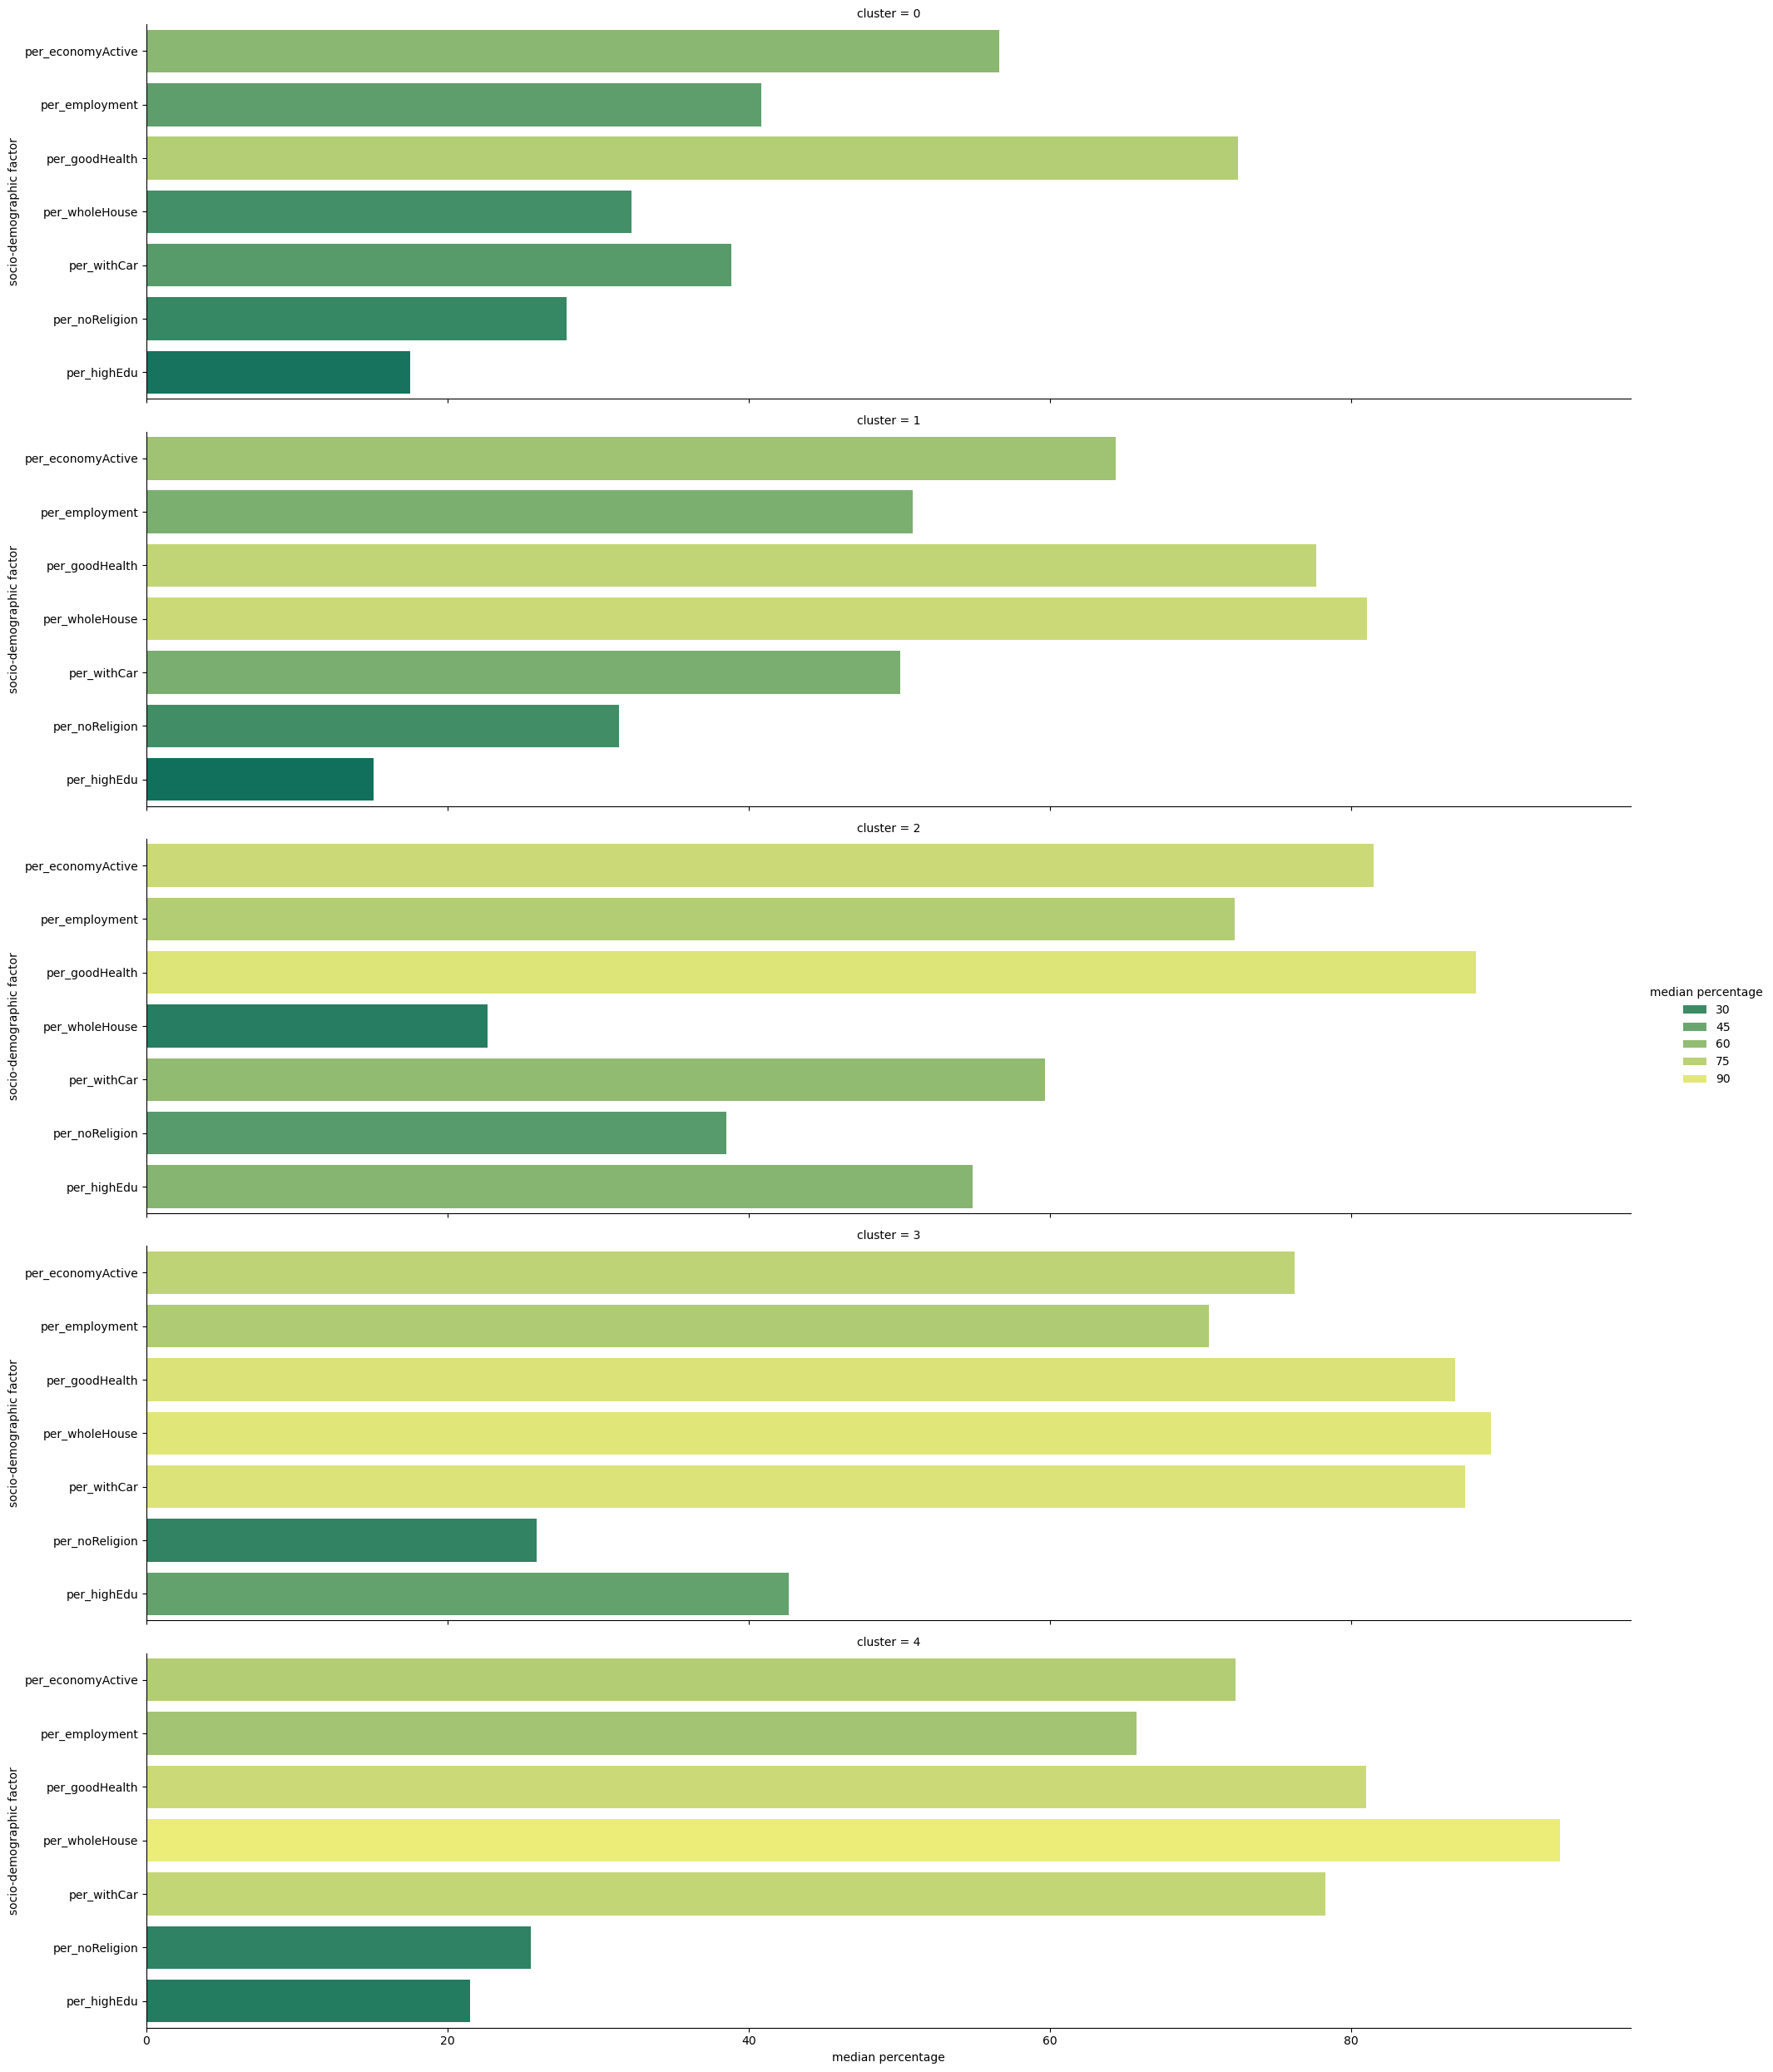

In [51]:
# Plot a faceted bar chart, where each row is a different cluster

sns.catplot(merge_data_mean_to_plot, 
            row='cluster', 
            y='socio-demographic factor', 
            x='median percentage',
            kind='bar', 
            aspect=4, 
            hue='median percentage',
            palette='summer')

According to the facet charts above, I conclude these five clusters as:

- 0: Low in the economic active, and possibly low in life quality
- 1: Moderate in the economic active and life quality, low in higher education rate and employment
- 2: High in the economic active and possibly with high life quality, prone to live in apartments
- 3: High in the economic active and possibly with high life quality, prone to live in whole houses
- 4: Moderate in the economic active and possibly with high life quality, low in higher education rate

In [52]:
# add cluster descriptions
merge_data.loc[merge_data['cluster']==0,'Cluster_description']='Low in the economic active, and possibly low in life quality'
merge_data.loc[merge_data['cluster']==1,'Cluster_description']='Moderate in the economic active and life quality, low in higher education rate and employment'
merge_data.loc[merge_data['cluster']==2,'Cluster_description']='High in the economic active and possibly with high life quality, prone to live in apartments'
merge_data.loc[merge_data['cluster']==3,'Cluster_description']='High in the economic active and possibly with high life quality, prone to live in whole houses'
merge_data.loc[merge_data['cluster']==4,'Cluster_description']='Moderate in the economic active and possibly with high life quality, low in higher education rate'
merge_data

,2011 output area,per_economyActive,per_employment,per_goodHealth,per_wholeHouse,per_withCar,per_noReligion,per_highEdu,cluster,Cluster_description
0,E00056750,76.303318,71.090047,78.494624,67.2,75.177305,29.032258,21.4,4,Moderate in the economic active and possibly w...
1,E00056751,81.132075,76.886792,90.878378,99.9,87.272727,31.418919,25.0,4,Moderate in the economic active and possibly w...
2,E00056752,76.375405,70.873786,86.732187,78.5,84.500000,30.958231,33.0,3,High in the economic active and possibly with ...
3,E00056753,65.771812,57.718121,57.317073,32.2,53.191489,24.390244,14.1,0,"Low in the economic active, and possibly low i..."
4,E00056754,81.730769,76.442308,89.705882,97.8,78.625954,37.132353,34.2,3,High in the economic active and possibly with ...
...,...,...,...,...,...,...,...,...,...,...
2538,E00170623,84.920635,73.809524,90.666667,93.2,63.529412,49.333333,26.0,4,Moderate in the economic active and possibly w...
2539,E00170887,89.847716,85.786802,93.436293,84.6,87.378641,37.065637,39.7,3,High in the economic active and possibly with ...
2540,E00170888,89.201878,86.384977,94.074074,60.0,94.827586,32.592593,49.3,3,High in the economic active and possibly with ...
2541,E00170889,65.567766,61.538462,83.502538,94.6,90.000000,22.335025,46.6,3,High in the economic active and possibly with ...


### 5 Data Visualisation


##### 5.1 OLS result
I have applied the OLS method in the last part, and understand the linear relationship between those socio-demographic factors can be described as the equation below:
</br></br><b>per_economicActive = 12.6702 + 0.6484 * per_employment + 0.201 * per_goodHealth - 0.0288 * per_wholeHouse + 0.1413 * per_noReligion</b></br></br>
This means: 

- 1 percentage of increase in people in employment contributes to 0.6484 percentage of increase in the economic active;
- 1 percentage of increase in people with good health contributes to 0.201 percentage of increase in the economic active;
- 1 percentage of increase in people living in whole house leads to 0.0288 percentage of decrease in the economic active;
- 1 percentage of increase in people with no religion contributes to 0.1413 percentage of increase in the economic active.

According to the summary output in the above part, this model explains most of the data. As the audience is the government, the reliability of the data and model is important. To understand if the result is more reliable, residual plot can be used to present whether or not the regression model is appropriate for the socio-demographic data<a href="https://www.statology.org/residual-plot-python/">[14]</a>.

1) first visualisation of the OLS model

<p>From the residual plot below, the residuals are randomly scattered around zero. However, there is a pattern that some residuals decreases as the predicted values increases, which is due to the the heteroscedasticity.</p>
<p>To solve this, I also tried another two method: Weighted Least Squares (WLS) and transforming data(to log(x) and log(y)).</p>

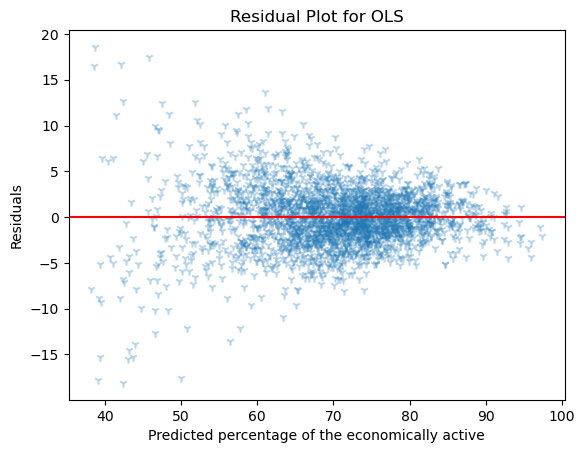

In [53]:
# create a residual plot of the model, change transparency and marker style
plt.scatter(y= ols_model.resid, x=ols_model.fittedvalues, alpha=.3, marker = '1')
# add label to x axis
plt.xlabel('Predicted percentage of the economically active')
# add label to y axis
plt.ylabel('Residuals')
# add title
plt.title('Residual Plot for OLS')
# Add a horizontal line at y=0 for reference
plt.axhline(y=0, color='r', linestyle='-')  
# plot
plt.show()

2) WLS and OLS(log)

In [54]:
# 1- WLS

# Calculate squared residuals
squared_residuals = ols_model.resid ** 2
# Estimate the variance of residuals
residual_variance = squared_residuals.median()
# Create weights based on the variance of residuals
weights = 1 / residual_variance
# Perform weighted least squares (WLS) regression
wls_model = sm.WLS(y, X, weights=weights).fit()
# Print summary of the WLS model
print(wls_model.summary())

# 2 - OLS(log)
# tranform data to log(value)
log_X = np.sqrt(X+1) # x+1 in the case of the infinite happens
log_y = np.sqrt(y)

# model fit
log_ols_model = sm.OLS(log_y, log_X).fit()

# model summary
print(log_ols_model.summary())

                            WLS Regression Results                            
Dep. Variable:      per_economyActive   R-squared:                       0.892
Model:                            WLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     5247.
Date:                Wed, 15 May 2024   Prob (F-statistic):               0.00
Time:                        15:35:35   Log-Likelihood:                -6680.7
No. Observations:                2543   AIC:                         1.337e+04
Df Residuals:                    2538   BIC:                         1.340e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             12.6702      0.669     18.

3) plot the residual plots

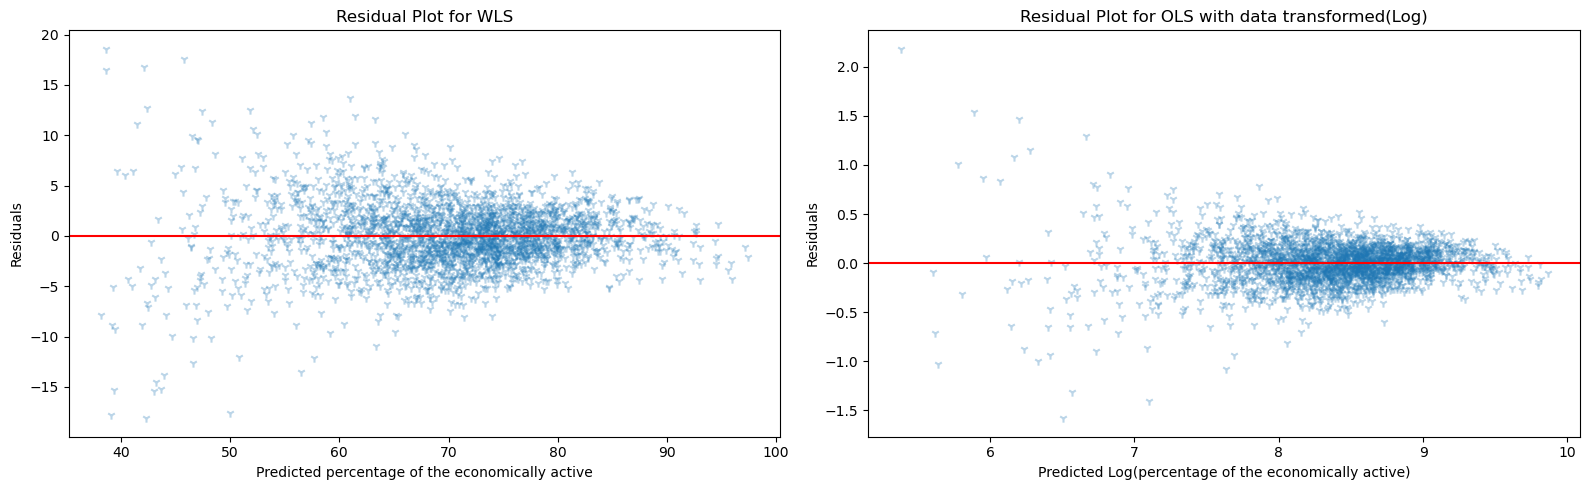

In [55]:
# create 2 plots and define plot size
f, ax = plt.subplots(1,2, figsize=(16,5))

# plot 1
# create a residual plot of the WLS model 
ax[0].scatter(y= wls_model.resid, x=wls_model.fittedvalues, alpha=.3, marker = '1')
# set labels 
ax[0].set_xlabel('Predicted percentage of the economically active')
ax[0].set_ylabel('Residuals')
# set title
ax[0].set_title('Residual Plot for WLS')
# Add horizontal line at y=0 for reference
ax[0].axhline(y=0, color='r', linestyle='-')  

# plot 2
# create a residual plot of the OLS model with data transformed
ax[1].scatter(y= log_ols_model.resid, x=log_ols_model.fittedvalues, alpha=.3, marker = '1')
# set labels 
ax[1].set_xlabel('Predicted Log(percentage of the economically active)')
ax[1].set_ylabel('Residuals')
# set title
ax[1].set_title('Residual Plot for OLS with data transformed(Log)')
# Add horizontal line at y=0 for reference
ax[1].axhline(y=0, color='r', linestyle='-')  

# adjust the layout
plt.tight_layout()
# show
plt.show()

4) <b>Result</b>

Even after adjustment, the model still behaves in heteroscedasticity; this may be caused by the big variance in data. However, even with this, the model can still explain some of the issues, especially in the aggregated areas, where points have few outliers. </br></br>

##### 5.2 Socio-demographic clustering pattern in Leeds
I want to show how those 5 clusters distribute in Leeds, if there is a clustering pattern. So I need to join the clustered data with the Leeds oa boundary data first.

1) join spatial data

In [56]:
# join merge data with boundary data
leeds_cluster = Leeds_oa.merge(merge_data, how='left', left_on='code', right_on='2011 output area')
leeds_cluster

,FID,code,label,name,geometry,2011 output area,per_economyActive,per_employment,per_goodHealth,per_wholeHouse,per_withCar,per_noReligion,per_highEdu,cluster,Cluster_description
0,0,E00058961,E08000035E02002335E01011713E00058961,,"POLYGON ((436439.550 443511.430, 436422.268 44...",E00058961,61.065574,58.606557,84.347826,87.0,97.315436,22.898551,49.3,3,High in the economic active and possibly with ...
1,1,E00059067,E08000035E02002358E01011720E00059067,,"POLYGON ((436137.132 437051.291, 436136.990 43...",E00059067,70.414201,60.355030,78.017241,68.8,47.663551,41.379310,9.8,1,Moderate in the economic active and life quali...
2,2,E00056935,E08000035E02002417E01011303E00056935,,"POLYGON ((441894.061 430432.764, 441893.098 43...",E00056935,78.750000,75.000000,84.000000,99.0,73.267327,32.444444,19.7,4,Moderate in the economic active and possibly w...
3,3,E00170058,E08000035E02002411E01033032E00170058,,"POLYGON ((429362.000 432215.000, 429363.000 43...",E00170058,63.829787,50.638298,72.390572,33.1,32.941176,22.222222,16.7,0,"Low in the economic active, and possibly low i..."
4,4,E00058216,E08000035E02002433E01011541E00058216,,"POLYGON ((426664.338 427875.792, 426666.669 42...",E00058216,62.573099,56.725146,64.435146,31.6,49.006623,21.338912,20.0,0,"Low in the economic active, and possibly low i..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2538,2538,E00058597,E08000035E02002401E01011622E00058597,,"POLYGON ((433482.734 433750.215, 433481.000 43...",E00058597,52.845528,37.804878,73.109244,76.0,34.751773,29.411765,9.4,1,Moderate in the economic active and life quali...
2539,2539,E00059049,E08000035E02002358E01011720E00059049,,"POLYGON ((436158.548 436772.352, 436155.706 43...",E00059049,65.686275,57.843137,77.739726,87.8,68.292683,28.424658,10.3,4,Moderate in the economic active and possibly w...
2540,2540,E00058371,E08000035E02002332E01011583E00058371,,"POLYGON ((420211.244 446683.222, 420211.098 44...",E00058371,71.825397,65.873016,83.636364,92.3,82.352941,26.969697,25.9,4,Moderate in the economic active and possibly w...
2541,2541,E00059051,E08000035E02002370E01011723E00059051,,"POLYGON ((436614.948 436057.769, 436610.049 43...",E00059051,57.364341,49.612403,64.719626,63.0,35.746606,27.336449,8.2,1,Moderate in the economic active and life quali...


2) visualisation


The next step is to visualise the clusters in Leeds. My audience is the stuffs in government, and I want to make the clustering pattern more clear and evident. Considering there may be some people with view deficiency, like colour blindness, I will manually choose another set of colour palette, which is colorblind-safe and print-friendly, according to Ferreira<a href="https://towardsdatascience.com/two-simple-steps-to-create-colorblind-friendly-data-visualizations-2ed781a167ec">[15]</a>. 

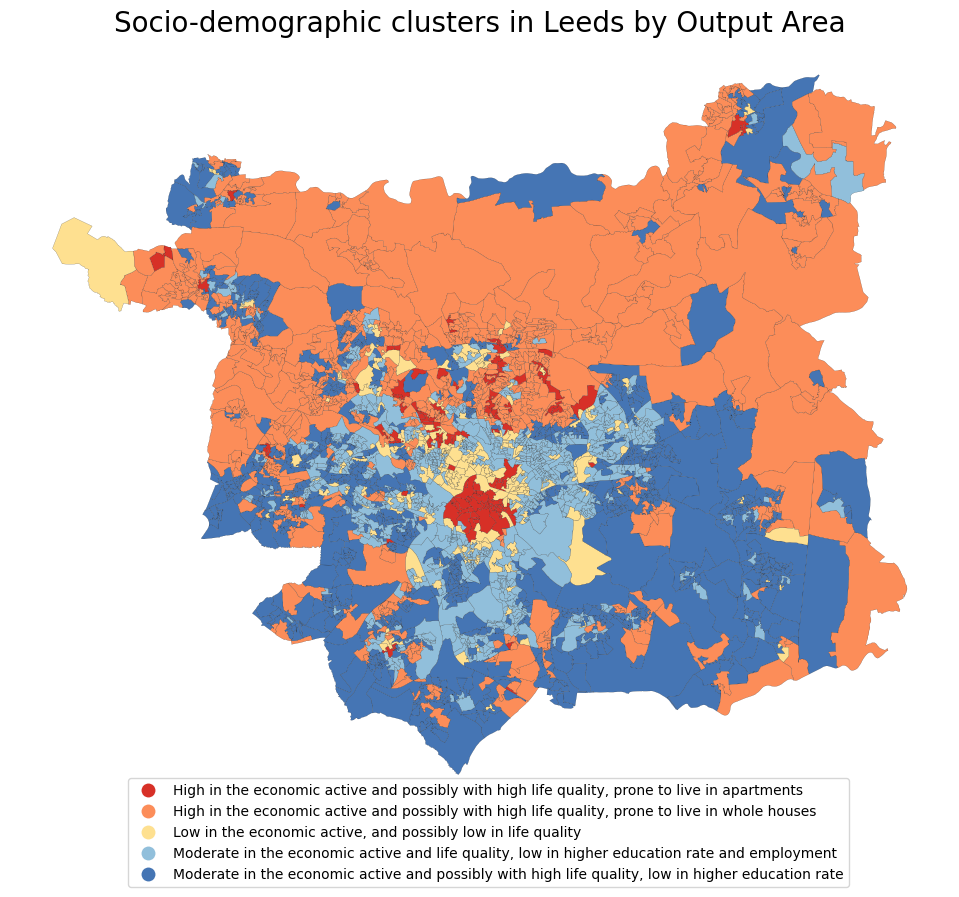

In [57]:
# define the plot size and nummber of subplots (1 i.e. 1 plot)
f, ax = plt.subplots(1, figsize=(18,10)) # return Figure, Axes
# define colour map
my_cmap = ListedColormap(['#d73027', '#fc8d59', '#fee090', '#91bfdb', '#4575b4'])
# plot the  data, specifying the subplot axis, add legend, add customised colour map, adjust line width and line colour
leeds_cluster.plot(ax=ax, column = 'Cluster_description', legend = True, cmap= my_cmap, linewidth=.1, edgecolor = '#000')
# set title and its font size
ax.set_title('Socio-demographic clusters in Leeds by Output Area', size = 20)
# delete the axis
ax.set_axis_off()
# set location of the legend
ax.get_legend().set_bbox_to_anchor((.9,.05))
# show the plot
plt.show()

3) <b>Result</b> 


Most of the socio-demographic clusters appear to have an aggregating inclination. The two clusters with a high percentage of economically active are distributed in northern Leeds, and some highly economically active OAs, with most people living in apartments, are in the centre of Leeds. Conversely, moderate clusters tend to appear in southern Leeds. Interestingly, the OAs with low economic activity are mostly situated in the centre of Leeds as well.

### References
<p><a href="https://www.nomisweb.co.uk/census/2011/qs601ew">[1]</a> nomis. 2011. Economic activity [KS601UK]. [Online]. [Accessed 8 May 2024]</p>
<p><a href="https://www.nomisweb.co.uk/census/2011/qs302ew">[2]</a> nomis. 2011. General health [QS302EW]. [Online]. [Accessed 8 May 2024]</p>
<p><a href="https://www.nomisweb.co.uk/census/2011/ks401ew">[3]</a> nomis. 2011. Dwellings, household spaces and accommodation type [KS401EW]. [Online]. [Accessed 8 May 2024]</p>
<p><a href="https://www.nomisweb.co.uk/census/2011/ks404ew">[4]</a> nomis. 2011. Car or van availability [KS404EW]. [Online]. [Accessed 8 May 2024]</p>
<p><a href="https://www.nomisweb.co.uk/census/2011/ks501uk">[5]</a> nomis. 2011. Qualifications and students [KS501UK]. [Online]. [Accessed 8 May 2024]</p>
<p><a href="https://www.nomisweb.co.uk/census/2011/ks209ew">[6]</a> nomis. 2011. Religion [KS209EW]. [Online]. [Accessed 8 May 2024]</p>
<p><a href="https://borders.ukdataservice.ac.uk/bds.html">[7]</a> UK Data Service. 2011. English Output Areas 2011. [Online]. [Accessed 8 May 2024]</p>
<p><a href="https://monkeylearn.com/blog/data-cleaning-steps/">[8]</a> Mesevage, T. G. 2021. Data Cleaning Steps & Process to Prep Your Data for Success. [Online]. [Accessed 13 May 2024] </p>
<p><a href="https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166">[9]</a> Koehrsen, W. 2018. Visualizing Data with Pairs Plots in Python. [Online]. [Accessed 13 May 2024] </p>
<p><a href="https://github.com/benmaier/cividis">[10]</a> benmaier. 2018. cividis. [Online]. [Accessed 13 May 2024] </p>
<p><a href="https://www.bmj.com/about-bmj/resources-readers/publications/statistics-square-one/11-correlation-and-regression">[11]</a> Swinscow, T. D. V. 1997. Statistics at Square One. [Online]. [Accessed 13 May 2024] </p>
<p><a href="https://www.statology.org/ols-regression-python/">[12]</a> Bobbitt, Z. 2022. How to Perform OLS Regression in Python (With Example). [Online]. [Accessed 13 May 2024]</p>
<p><a href="https://github.com/FrancescaPontin/GEOG5990">[13]</a> GEOG5990M course materials</p>
<p><a href="https://www.statology.org/residual-plot-python/">[14]</a> Bobbit, Z. 2020. How to Create a Residual Plot in Python. [Online]. [Accessed 13 May 2024]</p>
<p><a href="https://towardsdatascience.com/two-simple-steps-to-create-colorblind-friendly-data-visualizations-2ed781a167ec">[15]</a> Ferreira, C. 2020. Two Simple Steps to Create Colorblind-Friendly Data Visualisations. [Online]. [Accessed 13 May 2024]</p>
</br></br></br>

This is an example block of mardown text I want to reference <a href="#ref1">[1]</a>. I might need to add some more citations <a href="#ref2">[2]</a><a href="#ref2">[3]</a>
